In [1]:
#---Reading cleaned data

library(car)
library(ggplot2)
library(randomForest)
dat <- read.csv('/Users/tete/628data/cleaned_without_reivews.csv', header = T)
dat[, 'is_open'] <- as.factor(dat[, 'is_open'])
dat[, 'RestaurantsPriceRange2'] <- as.factor(dat[, 'RestaurantsPriceRange2'])
dat <- dat[, -which(names(dat) == 'state')]
dat <- dat[, -which(names(dat) == 'is_open')]

Loading required package: carData
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



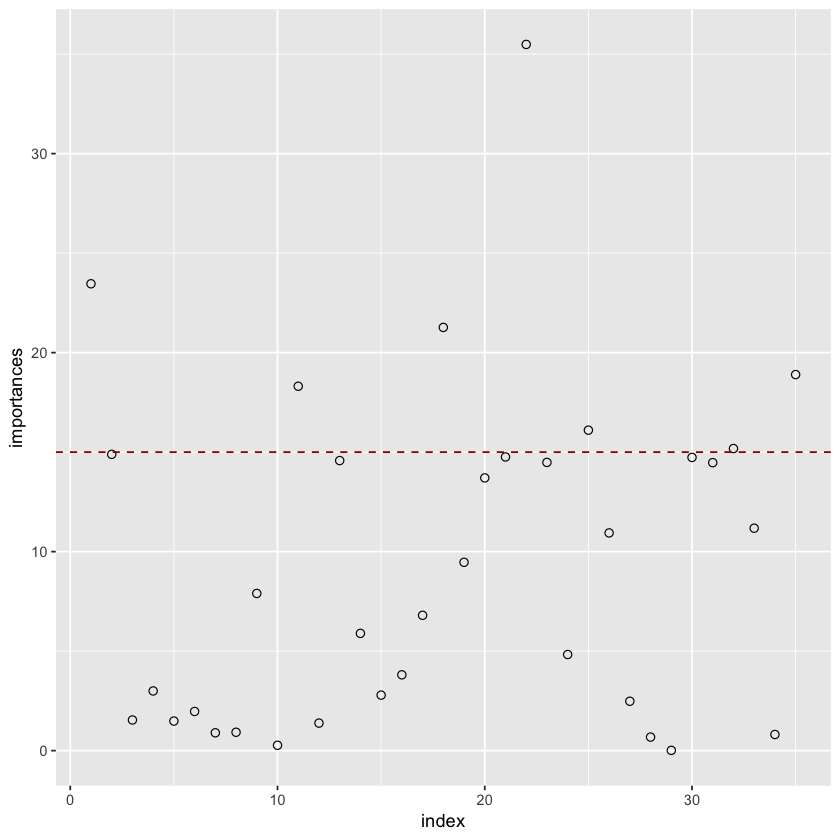

In [2]:
#---Conduct random forest algorithm

rf <- randomForest(ratings ~ ., data = dat, na.action = na.omit, proximity = T)
impo <- importance(rf, type = 2)
importances <- data.frame(index = 1:length(impo), importances = as.numeric(impo))
ggplot(importances, aes(x = index, y = importances)) + geom_point(size = 2,shape = 21) +
  geom_hline(aes(yintercept=15), colour="#990000", linetype="dashed")

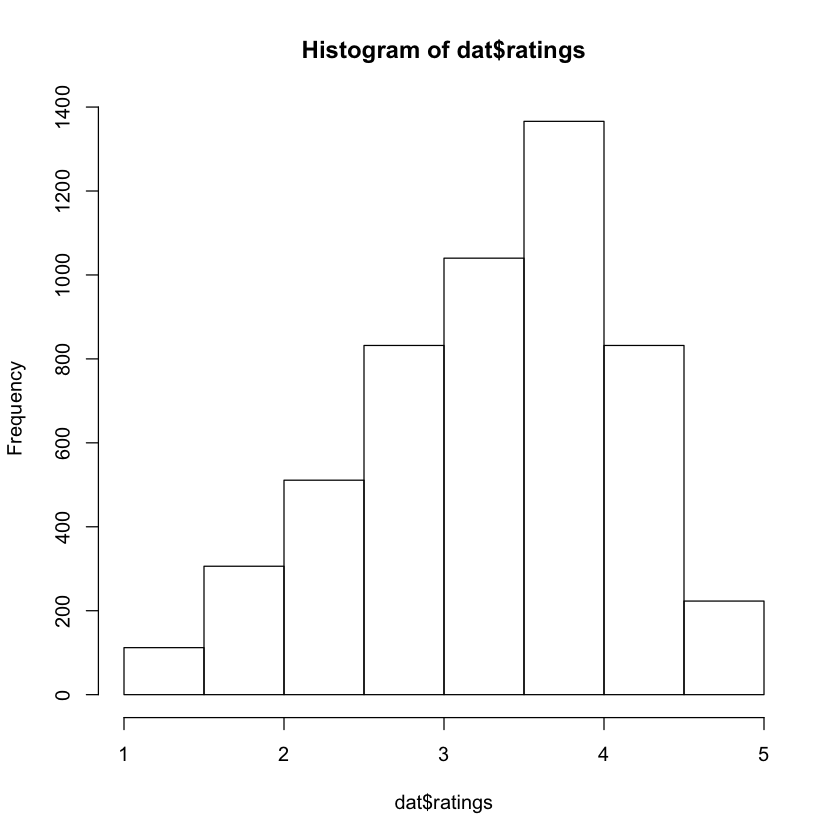

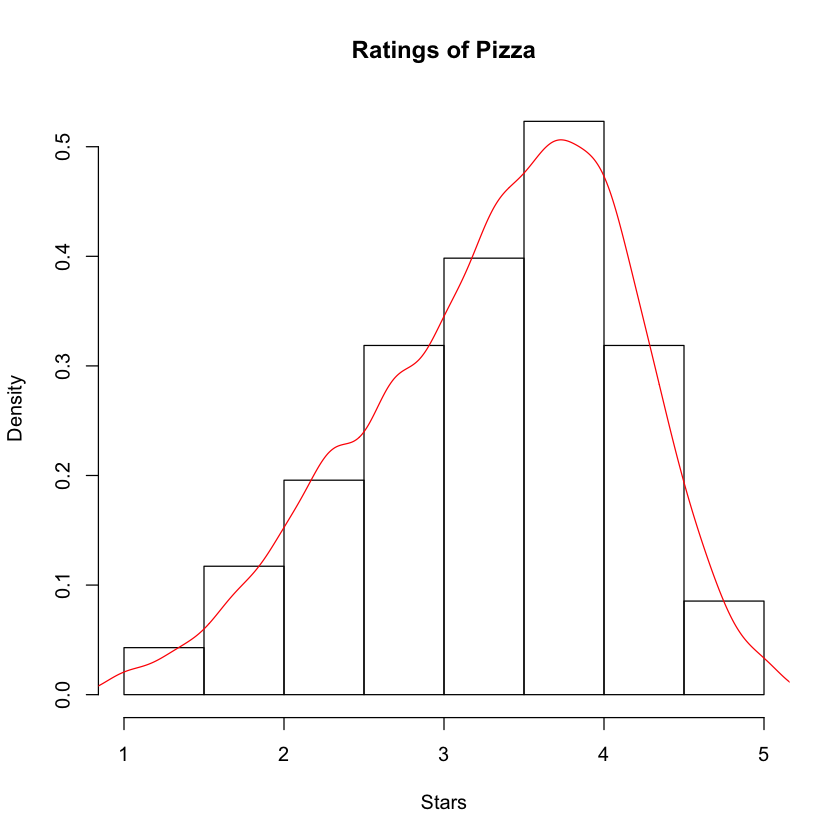

In [3]:
#---Plot the density plot of the stars

plot(hist(dat$ratings), xlab = 'Stars', freq = F, main = "Ratings of Pizza")
lines(density(dat$ratings), col = 'red')

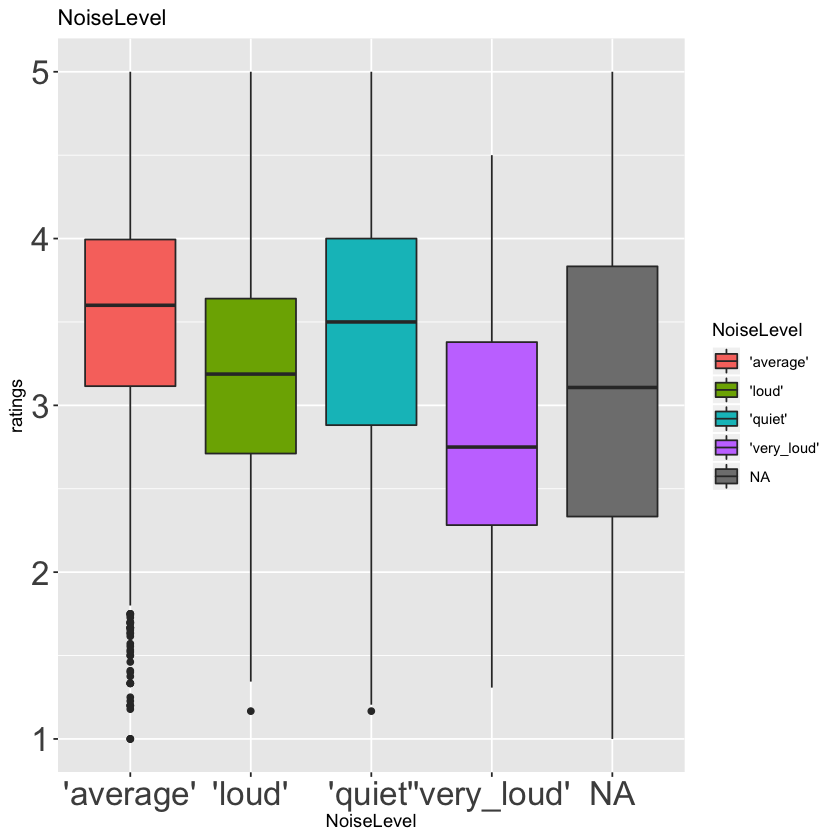

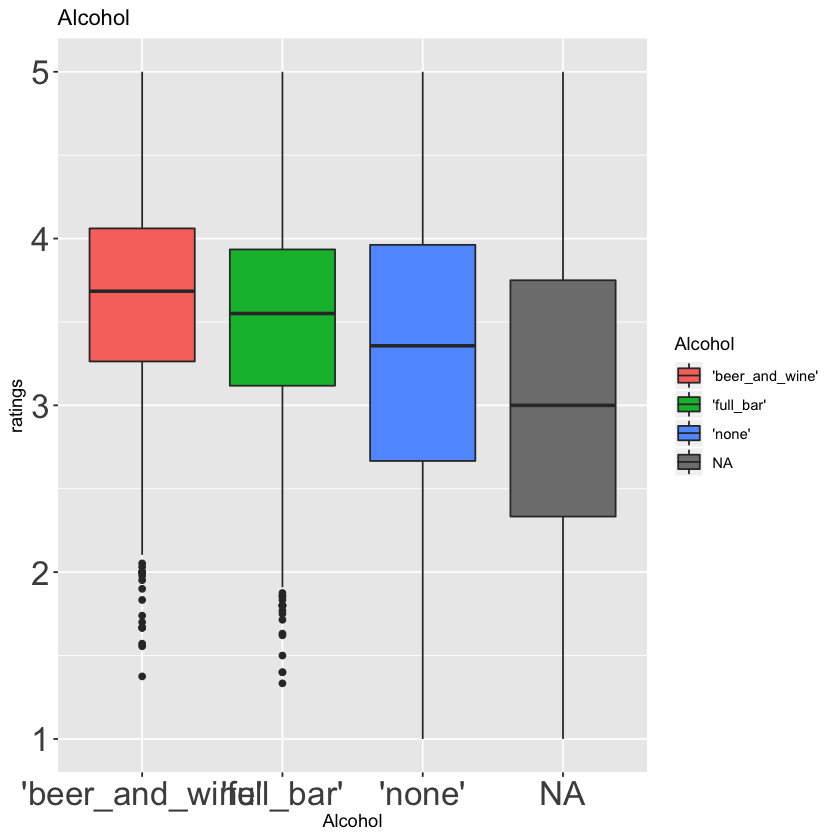

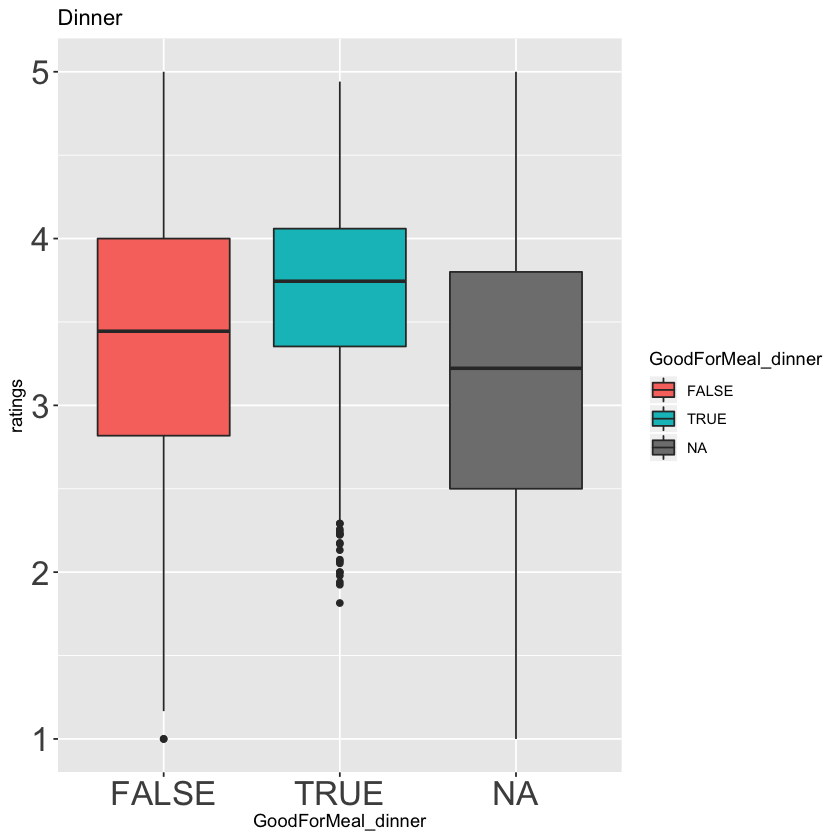

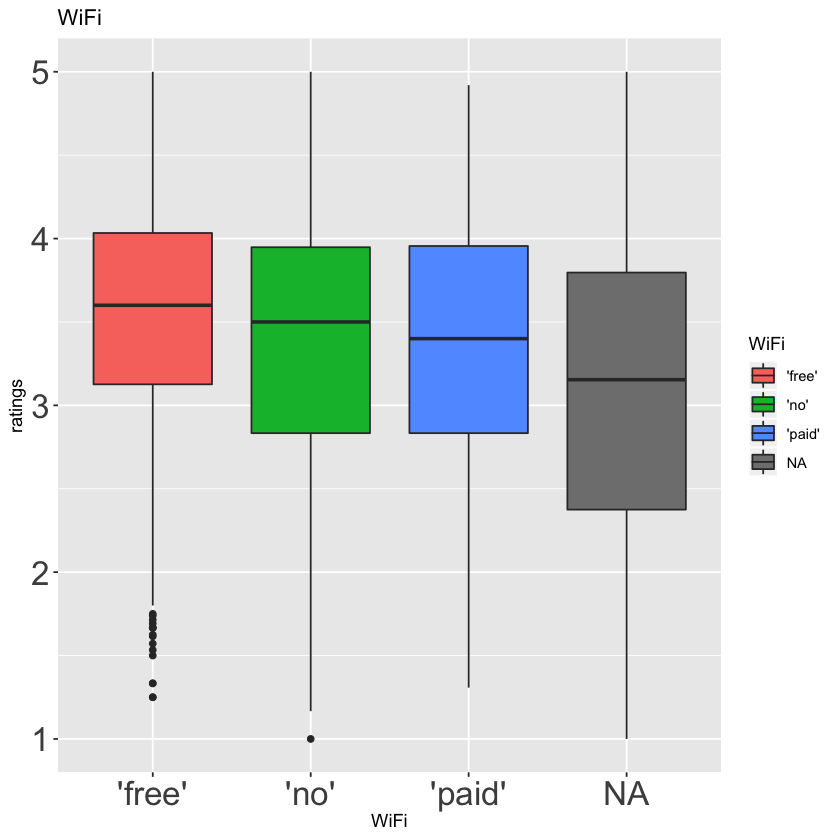

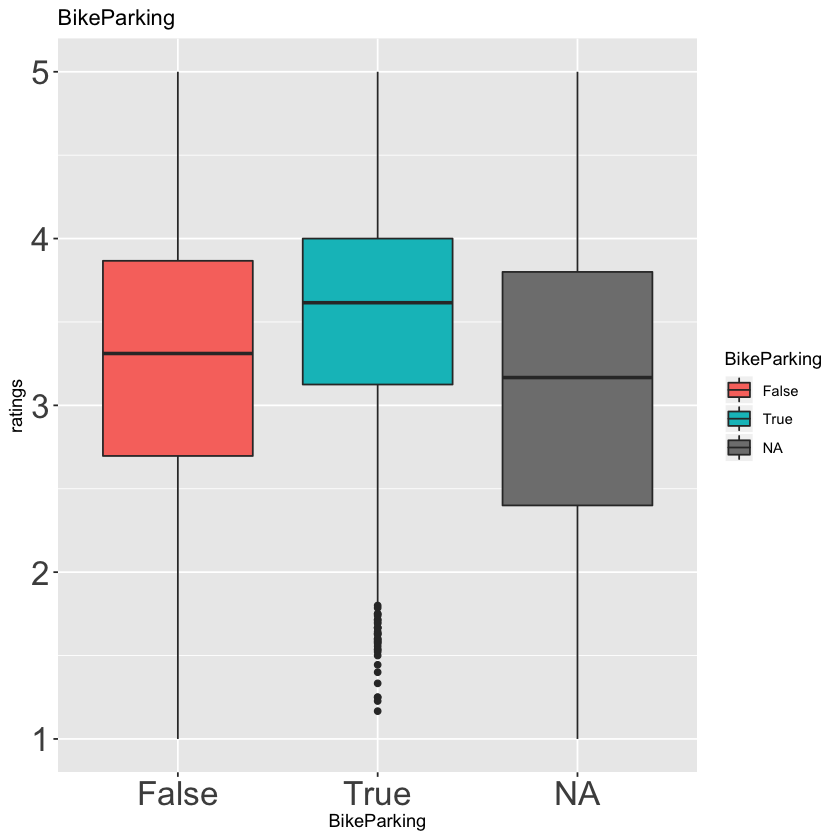

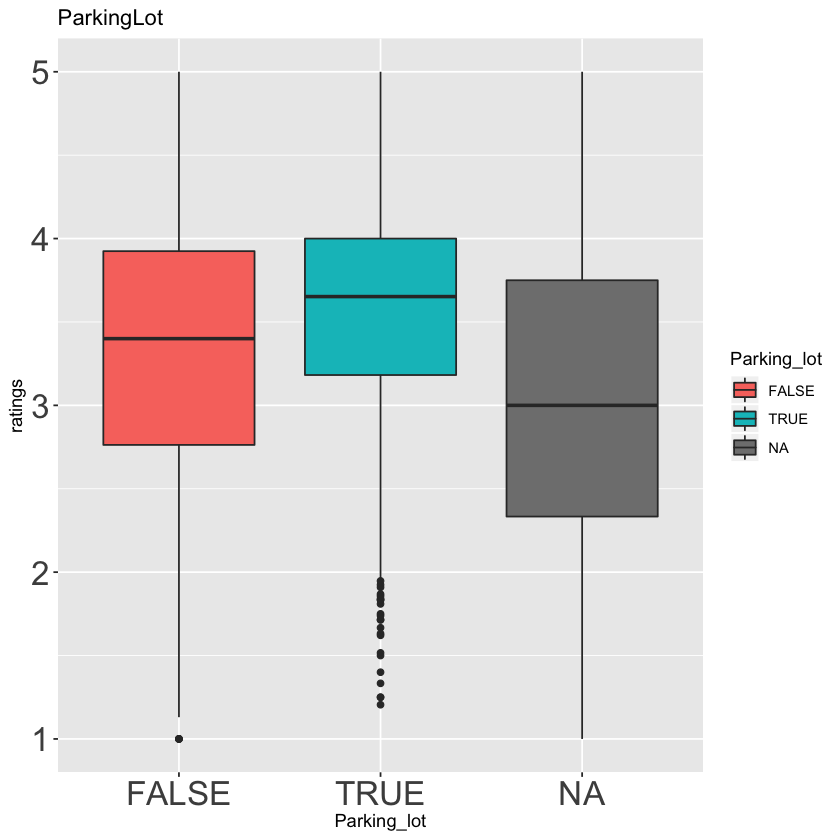

In [4]:
#---The plots of variables and ratings

ggplot(dat ,aes(x = NoiseLevel,y = ratings,fill = NoiseLevel))+geom_boxplot()+labs(title="NoiseLevel") + theme(axis.text=element_text(size=20))
ggplot(dat ,aes(x = Alcohol,y = ratings,fill = Alcohol))+geom_boxplot()+labs(title="Alcohol") + theme(axis.text=element_text(size=20))
ggplot(dat ,aes(x = GoodForMeal_dinner,y = ratings,fill = GoodForMeal_dinner))+geom_boxplot()+labs(title="Dinner") + theme(axis.text=element_text(size=20))
ggplot(dat ,aes(x = WiFi,y = ratings,fill = WiFi))+geom_boxplot()+labs(title="WiFi") + theme(axis.text=element_text(size=20))
ggplot(dat ,aes(x = BikeParking,y = ratings,fill = BikeParking))+geom_boxplot()+labs(title="BikeParking") + theme(axis.text=element_text(size=20))
ggplot(dat ,aes(x = Parking_lot,y = ratings,fill = Parking_lot))+geom_boxplot()+labs(title="ParkingLot") + theme(axis.text=element_text(size=20))